In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [ ]:
df=pd.read_csv('/Users/arnav/Downloads/german_credit_data.csv')
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car
...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,996,40,male,3,own,little,little,3857,30,car
997,997,38,male,2,own,little,NaN,804,12,radio/TV
998,998,23,male,2,free,little,little,1845,45,radio/TV


In [ ]:
df.isnull().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

In [ ]:
df.drop("Checking account",axis="columns",inplace=True)

In [ ]:
#lets work on the missing values
#we use fwd fill and back fill
df["Saving accounts"].fillna(method="bfill",inplace=True)

In [ ]:
#dropping the first column as its of no use
df.drop(columns='Unnamed: 0',axis="columns",inplace=True)
df.head()

,Age,Sex,Job,Housing,Saving accounts,Credit amount,Duration,Purpose
0,67,male,2,own,little,1169,6,radio/TV
1,22,female,2,own,little,5951,48,radio/TV
2,49,male,1,own,little,2096,12,education
3,45,male,2,free,little,7882,42,furniture/equipment
4,53,male,2,free,little,4870,24,car


In [ ]:
df.corrwith(df["Credit amount"],axis=0) #data corellation wih each other

Age              0.032716
Job              0.285385
Credit amount    1.000000
Duration         0.624984
dtype: float64

In [ ]:
dfe=df.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
  dfe.Sex=le.fit_transform(dfe.Sex)
dfe.Housing=le.fit_transform(dfe.Housing)
dfe["Saving accounts"]=le.fit_transform(dfe["Saving accounts"])

In [ ]:
dfe

,Age,Sex,Job,Housing,Saving accounts,Credit amount,Duration,Purpose
0,67,1,2,1,0,1169,6,radio/TV
1,22,0,2,1,0,5951,48,radio/TV
2,49,1,1,1,0,2096,12,education
3,45,1,2,0,0,7882,42,furniture/equipment
4,53,1,2,0,0,4870,24,car
...,...,...,...,...,...,...,...,...
995,31,0,1,1,0,1736,12,furniture/equipment
996,40,1,3,1,0,3857,30,car
997,38,1,2,1,0,804,12,radio/TV
998,23,1,2,0,0,1845,45,radio/TV


/Users/arnav/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

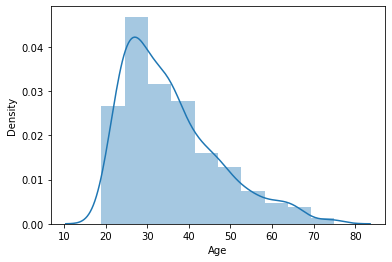

In [ ]:
import seaborn as sns
sns.distplot(df["Age"],bins=10,kde=True)

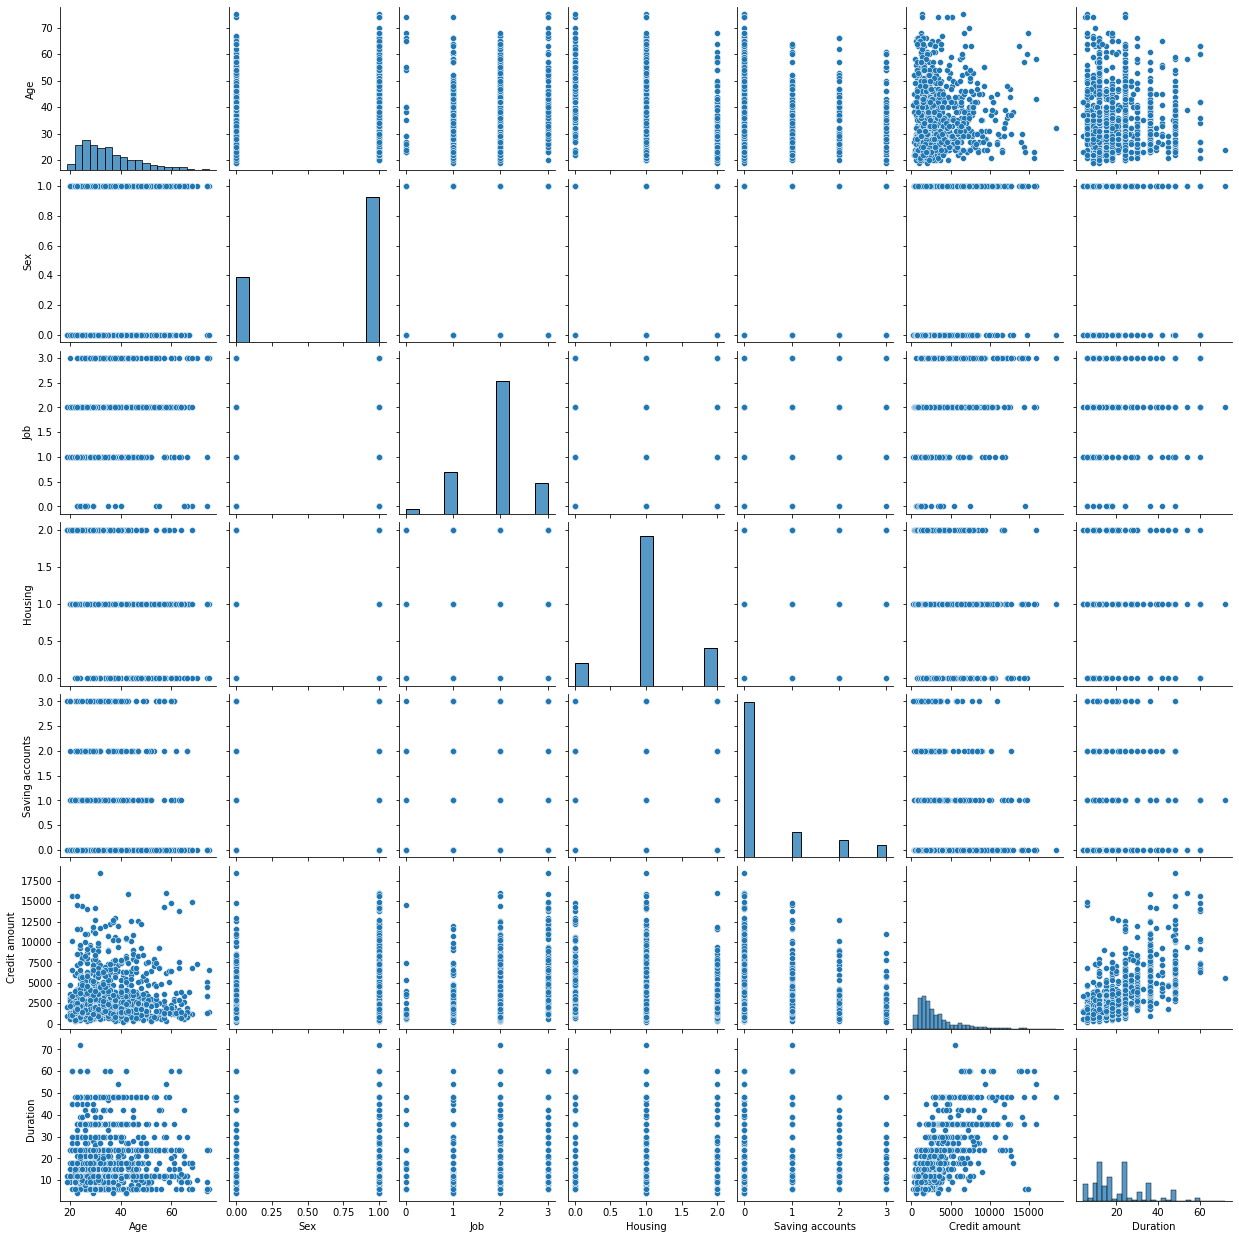

In [ ]:
sns.pairplot(dfe)

In [ ]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Credit amount',
       'Duration', 'Purpose'],
      dtype='object')

In [ ]:
dfe1=df.copy()
dfe1.drop('Saving accounts', axis =1, inplace=True)
dfe1.Job = dfe1.Job.astype(str)
dfe1= dfe1[['Age', 'Sex', 'Job', 'Housing', 'Credit amount',
       'Duration', 'Purpose']]
X1 = pd.get_dummies(dfe1)
X1.head()

,Age,Credit amount,Duration,Sex_female,Sex_male,Job_0,Job_1,Job_2,Job_3,Housing_free,Housing_own,Housing_rent,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,67,1169,6,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
1,22,5951,48,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
2,49,2096,12,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
3,45,7882,42,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0
4,53,4870,24,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0


In [ ]:
from sklearn.preprocessing import normalize
X=normalize(X1)

Text(0.5, 1.0, 'Elbow curve')

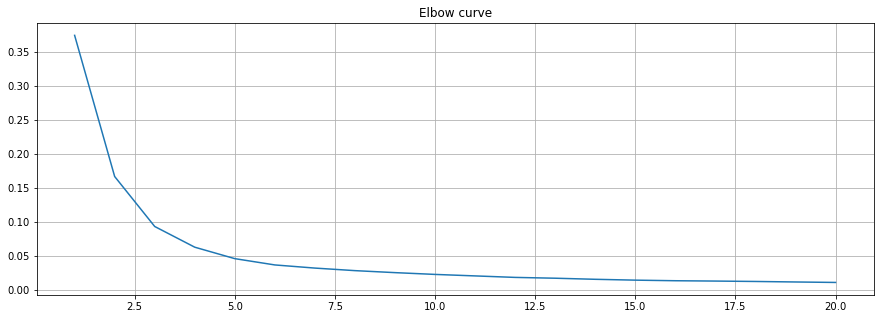

In [ ]:
#K-Means code:
distorsions = []
for k in range(1,21):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)
    
fig = plt.figure(figsize=(15,5))
plt.plot(range(1,21),distorsions)
plt.grid(True)
plt.title('Elbow curve')

In [ ]:
#ML model KMeans:
from sklearn.cluster import KMeans
km=KMeans(n_clusters =5, max_iter=10000, random_state=None)
km.fit_transform(X)

array([[0.04950529, 0.02243123, 0.07547983, 0.03798274, 0.01295935],
       [0.00462744, 0.0328081 , 0.12749754, 0.015975  , 0.06144312],
       [0.01562865, 0.01460127, 0.10843047, 0.00562791, 0.04248956],
       ...,
       [0.04053686, 0.01138875, 0.08351422, 0.02818432, 0.0174881 ],
       [0.01911419, 0.02643163, 0.11768564, 0.01624981, 0.05291121],
       [0.00437919, 0.03040801, 0.12509852, 0.01367582, 0.05905461]])

In [ ]:
#Kmeans Score: Helps me to validate whether the no. of clusters given is suitable or not
km.score(X)

-0.04600604475495289

In [ ]:
#Silhouette Score:
from sklearn.metrics import silhouette_score

In [ ]:
silhouette_score(X, km.labels_)

0.4644908373360706